<a href="https://colab.research.google.com/github/juneadkhan/BIOS512/blob/main/juneadkhan_BIOS512_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Exploration of a Relational Formula 1 Dataset
### Junead Khan - Bios 512 - Final Project


![F1 Car](https://cdn.vox-cdn.com/thumbor/xp5CnzPLoVWxKdy5-98FHe4G8Mw=/0x0:3804x2536/1200x800/filters:focal(1598x964:2206x1572)/cdn.vox-cdn.com/uploads/chorus_image/image/69990479/1235804305.0.jpg)


In [28]:
library('tidyverse')
install.packages("ggthemes")
library("ggthemes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data
This exploration involved 3 tables, all linked relationally. Please see below for Schemas.

### ```drivers```
| Field       | Type         | Null | Key | Default | Extra          | Description              |
|-------------|--------------|------|-----|---------|----------------|--------------------------|
| driverId    | int(11)      | NO   | PRI | NULL    | auto_increment | Primary key              |
| driverRef   | varchar(255) | NO   |     |         |                | Unique driver identifier |
| number      | int(11)      | YES  |     | NULL    |                | Permanent driver number  |
| code        | varchar(3)   | YES  |     | NULL    |                | Driver code e.g. "ALO"   |     
| forename    | varchar(255) | NO   |     |         |                | Driver forename          |
| surname     | varchar(255) | NO   |     |         |                | Driver surname           |
| dob         | date         | YES  |     | NULL    |                | Driver date of birth     |
| nationality | varchar(255) | YES  |     | NULL    |                | Driver nationality       |
| url         | varchar(255) | NO   | UNI |         |                | Driver Wikipedia page    |

### ```qualifying```
| Field         | Type         | Null | Key | Default | Extra          | Description                            |
|---------------|--------------|------|-----|---------|----------------|----------------------------------------|
| qualifyId     | int(11)      | NO   | PRI | NULL    | auto_increment | Primary key                            |
| raceId        | int(11)      | NO   |     | 0       |                | Foreign key link to races table        |
| driverId      | int(11)      | NO   |     | 0       |                | Foreign key link to drivers table      |
| constructorId | int(11)      | NO   |     | 0       |                | Foreign key link to constructors table |
| number        | int(11)      | NO   |     | 0       |                | Driver number                          |
| position      | int(11)      | YES  |     | NULL    |                | Qualifying position                    |
| q1            | varchar(255) | YES  |     | NULL    |                | Q1 lap time e.g. "1:21.374"            |
| q2            | varchar(255) | YES  |     | NULL    |                | Q2 lap time                            |
| q3            | varchar(255) | YES  |     | NULL    |                | Q3 lap time                            |

### ```results```
| Field           | Type         | Null | Key | Default | Extra          | Description                                 |
|-----------------|--------------|------|-----|---------|----------------|---------------------------------------------|
| resultId        | int(11)      | NO   | PRI | NULL    | auto_increment | Primary key                                 |
| raceId          | int(11)      | NO   |     | 0       |                | Foreign key link to races table             |
| driverId        | int(11)      | NO   |     | 0       |                | Foreign key link to drivers table           |
| constructorId   | int(11)      | NO   |     | 0       |                | Foreign key link to constructors table      |
| number          | int(11)      | YES  |     | NULL    |                | Driver number                               |
| grid            | int(11)      | NO   |     | 0       |                | Starting grid position                      |
| position        | int(11)      | YES  |     | NULL    |                | Official classification, if applicable      |
| positionText    | varchar(255) | NO   |     |         |                | Driver position string e.g. "1" or "R"      |
| positionOrder   | int(11)      | NO   |     | 0       |                | Driver position for ordering purposes       |
| points          | float        | NO   |     | 0       |                | Driver points for race                      |
| laps            | int(11)      | NO   |     | 0       |                | Number of completed laps                    |
| time            | varchar(255) | YES  |     | NULL    |                | Finishing time or gap                       |
| milliseconds    | int(11)      | YES  |     | NULL    |                | Finishing time in milliseconds              |   
| fastestLap      | int(11)      | YES  |     | NULL    |                | Lap number of fastest lap                   |
| rank            | int(11)      | YES  |     | 0       |                | Fastest lap rank, compared to other drivers |
| fastestLapTime  | varchar(255) | YES  |     | NULL    |                | Fastest lap time e.g. "1:27.453"            |
| fastestLapSpeed | varchar(255) | YES  |     | NULL    |                | Fastest lap speed (km/h) e.g. "213.874"     |
| statusId        | int(11)      | NO   |     | 0       |                | Foreign key link to status table            |





In [109]:
drivers <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/drivers.csv')
qualifying <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/qualifying.csv')
results <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-09-07/results.csv')

Rows: 853 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): driverRef, number, code, forename, surname, nationality, url
dbl  (1): driverId
date (1): dob


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 8953 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): q1, q2, q3
dbl (6): qualifyId, raceId, driverId, constructorId, number, position


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 25220 Columns: 18

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): position, positionText, time, milliseconds, fastestLap, rank, fast...
dbl (10): resultId, raceId, driverId, constructorId, n

## Qualifying vs Race Drivers

The first thing I wanted to explore was which Modern Formula 1 drivers were better at qualifying and which were better in races. Qualifying is the event on teh Saturday of a Grand Prix with 1st place earning the driver 'Pole Position' for Sunday's race. A victory on Sunday constitues a Race Win. Some drivers are known for being better at Qualifying and others better in race trim. The exploration below plots drivers by the number of wins and number of pole positions respectivley. A y=x line divides the space in 2, with those on the left indicating better qualifying drivers, and those on the right being better race drivers. From the below analysis, we find that Drivers such as Fernando Alonso, Jenson Button and David Coulthard are better in race trim while drivers such as Nico Rosberg, Felipe Massa and Sebastian Vettel are better at qualifying. 

Joining, by = "driverId"



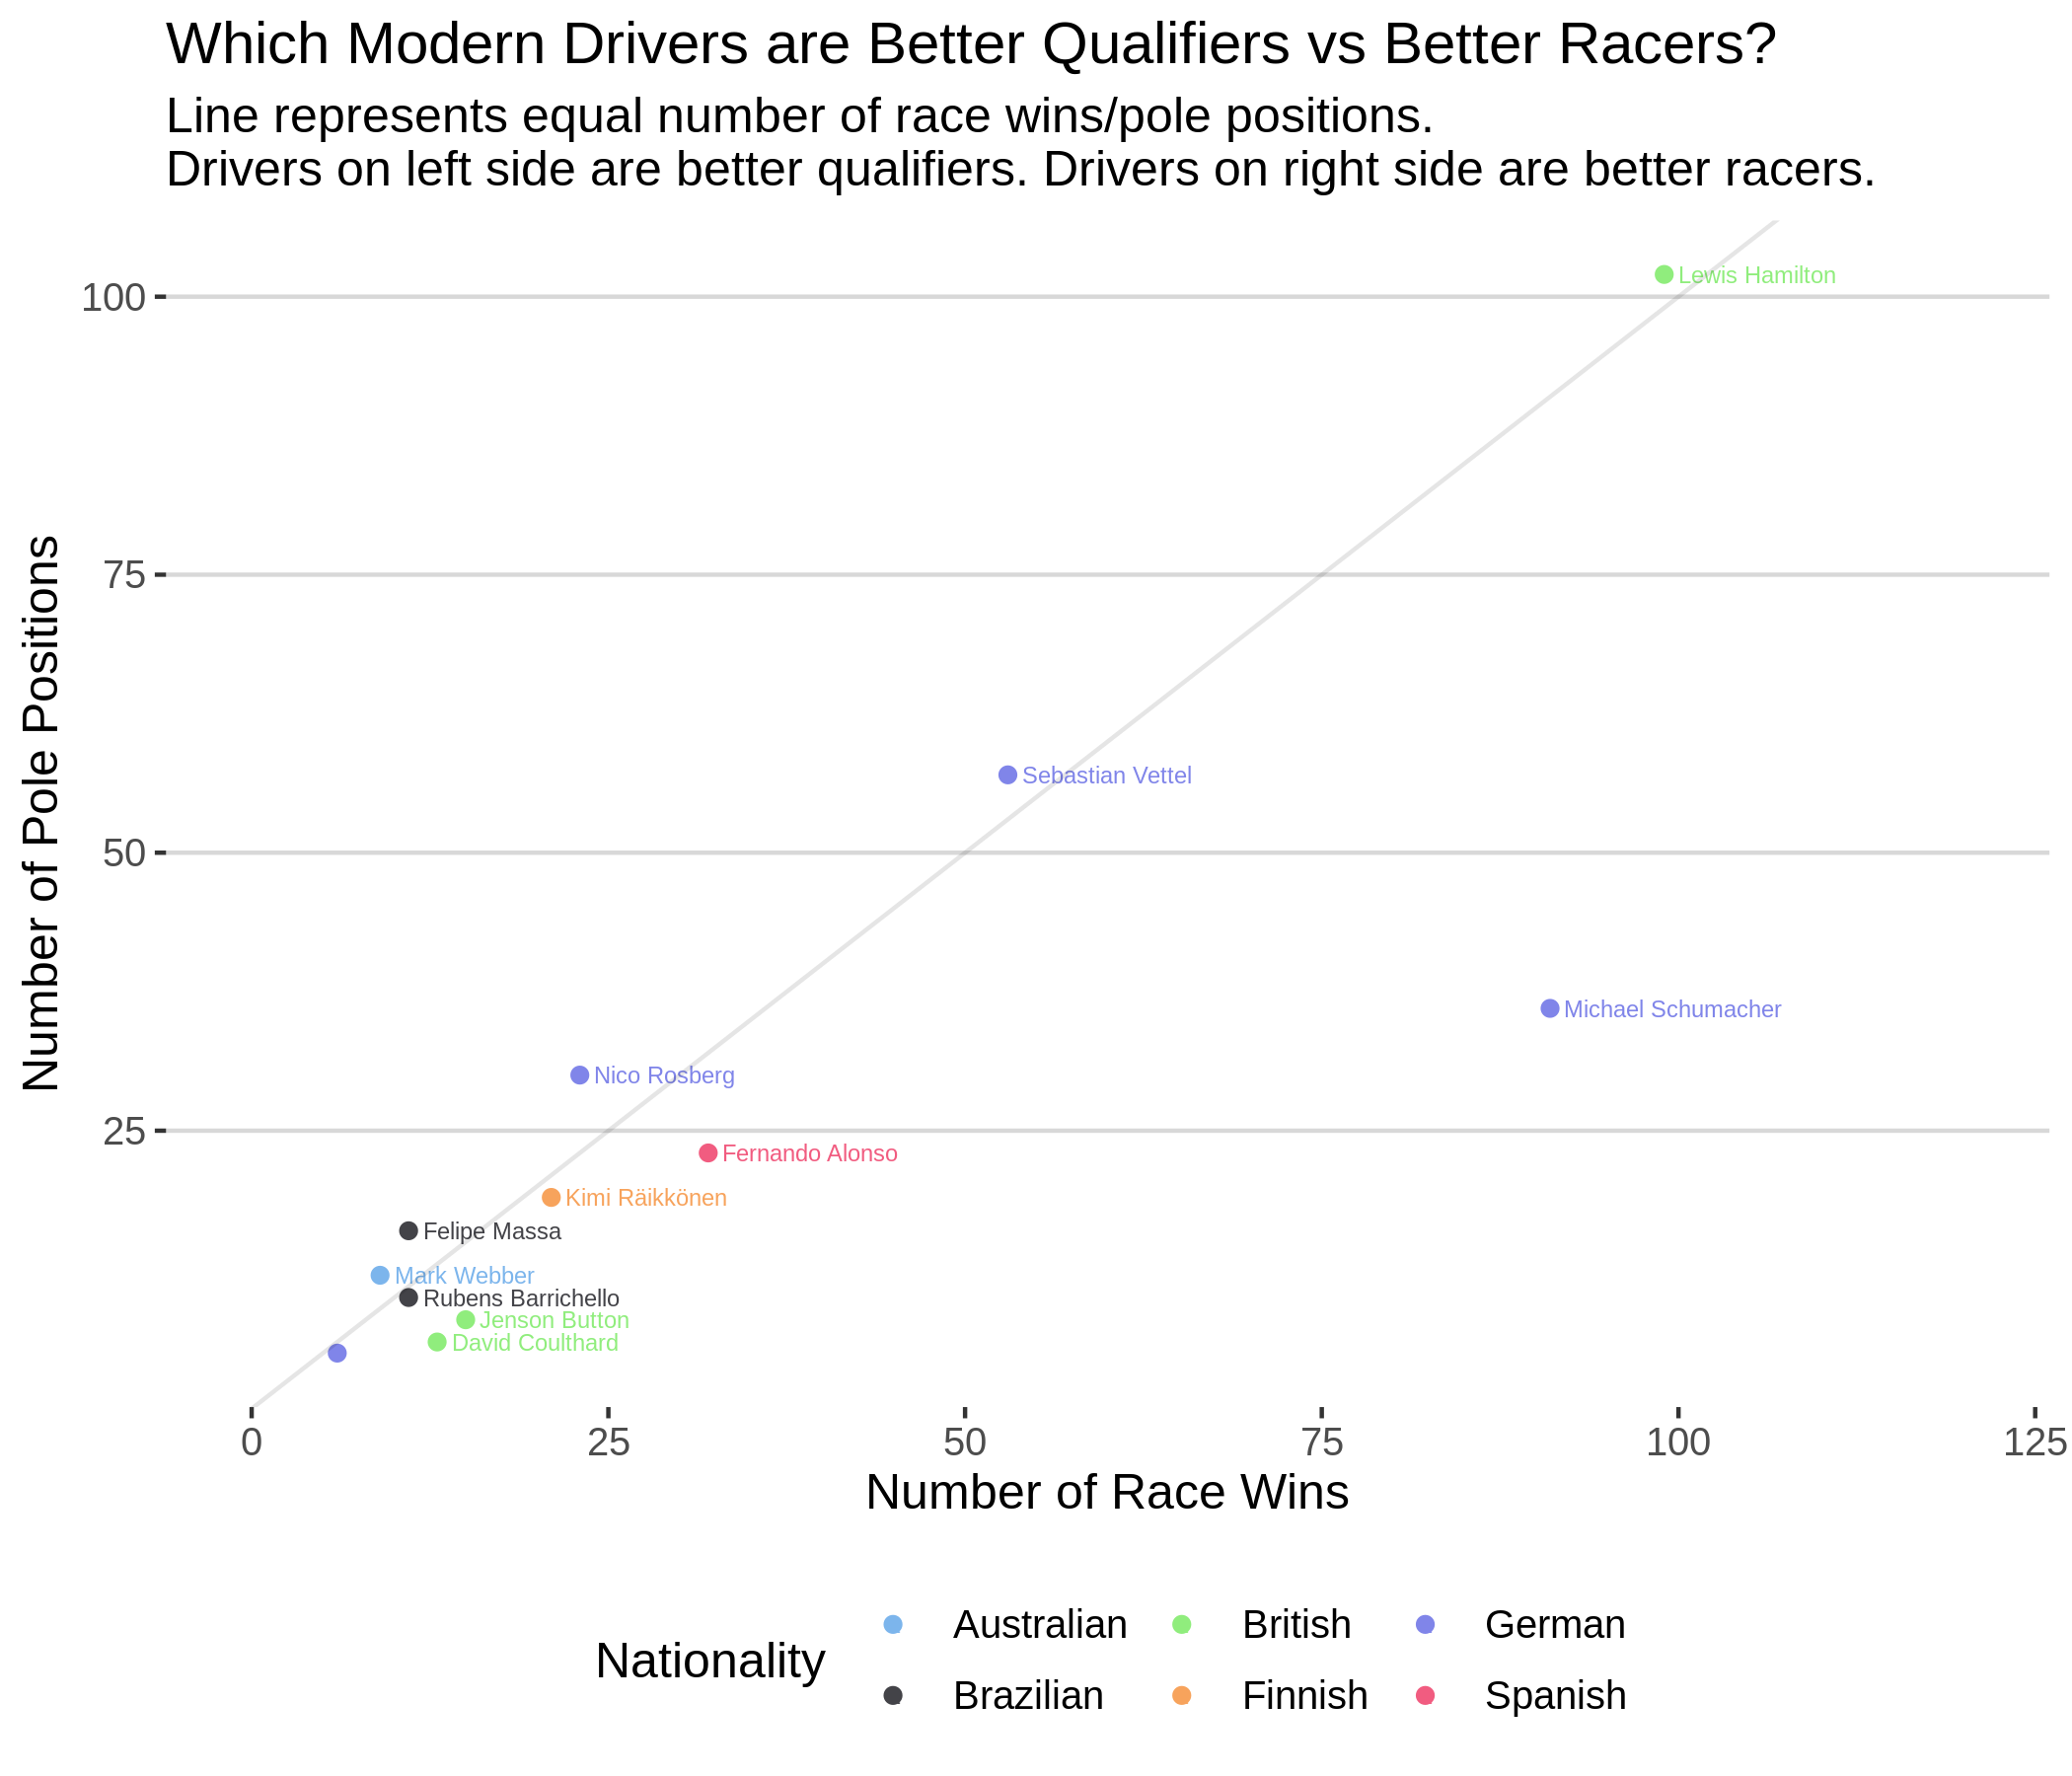

In [123]:
race_results = results %>% filter(position == 1) %>% group_by(driverId) %>% summarise(n = n()) # Summarize the number of 1st Place (Race Wins) by driverId.
qualifying_results = qualifying %>% filter(position == 1) %>% group_by(driverId) %>% summarise(n = n()) #  # Summarize the number of 1st Place (Pole Positions) by driverId.
combined_results = race_results %>% left_join(qualifying_results, by = 'driverId') %>% left_join(drivers) %>% filter(driverId <= 30) # Combine race/qualifying results. Keep top 30 drivers.
combined_results$fullname <- paste(combined_results$forename, combined_results$surname) # Create fullname column by combining forename and surname.
combined_results = combined_results %>% top_n(12, n.x) %>% rename(Nationality = nationality) # Keep the top 12 drivers and rename nationality to a capital letter.

options(repr.plot.width=7, repr.plot.height=6, repr.plot.res = 300)

p = ggplot(data = combined_results, aes(x = n.x, y = n.y, label = fullname, color = Nationality))

p = p + geom_point() + geom_text(check_overlap = TRUE, hjust = 0, nudge_x = 1, size = 2, nudge_y = 0) + xlim(0, 120) + geom_abline(intercept = 0, slope = 1, alpha = 0.1)

p = p + xlab("Number of Race Wins") + ylab("Number of Pole Positions") + labs(title = "Which Modern Drivers are Better Qualifiers vs Better Racers?",
              subtitle = "Line represents equal number of race wins/pole positions.\nDrivers on left side are better qualifiers. Drivers on right side are better racers.")

p + theme_hc() + scale_colour_hc()

## Which Country has the most race winners?

The above analysis showed that there are a lot of British and German drivers with high race wins. I am curious to know which country has the most race winners. When looking at the below analysis, we see that Britain has produced the most F1 Race Winners at 16. Suprisingly, there are 15 American Race Winners while no American drivers were present in the graph above. Also, there were only 7 German winners, while 3 of the top 4 drivers in the above chart were German. This indicates that there were a lot of American Drivers who had won a race, but not many that won several. Meanwhile, there were a relativley small number of German Race Winning Drivers, but those drivers often won a high number of races.

Joining, by = "driverId"



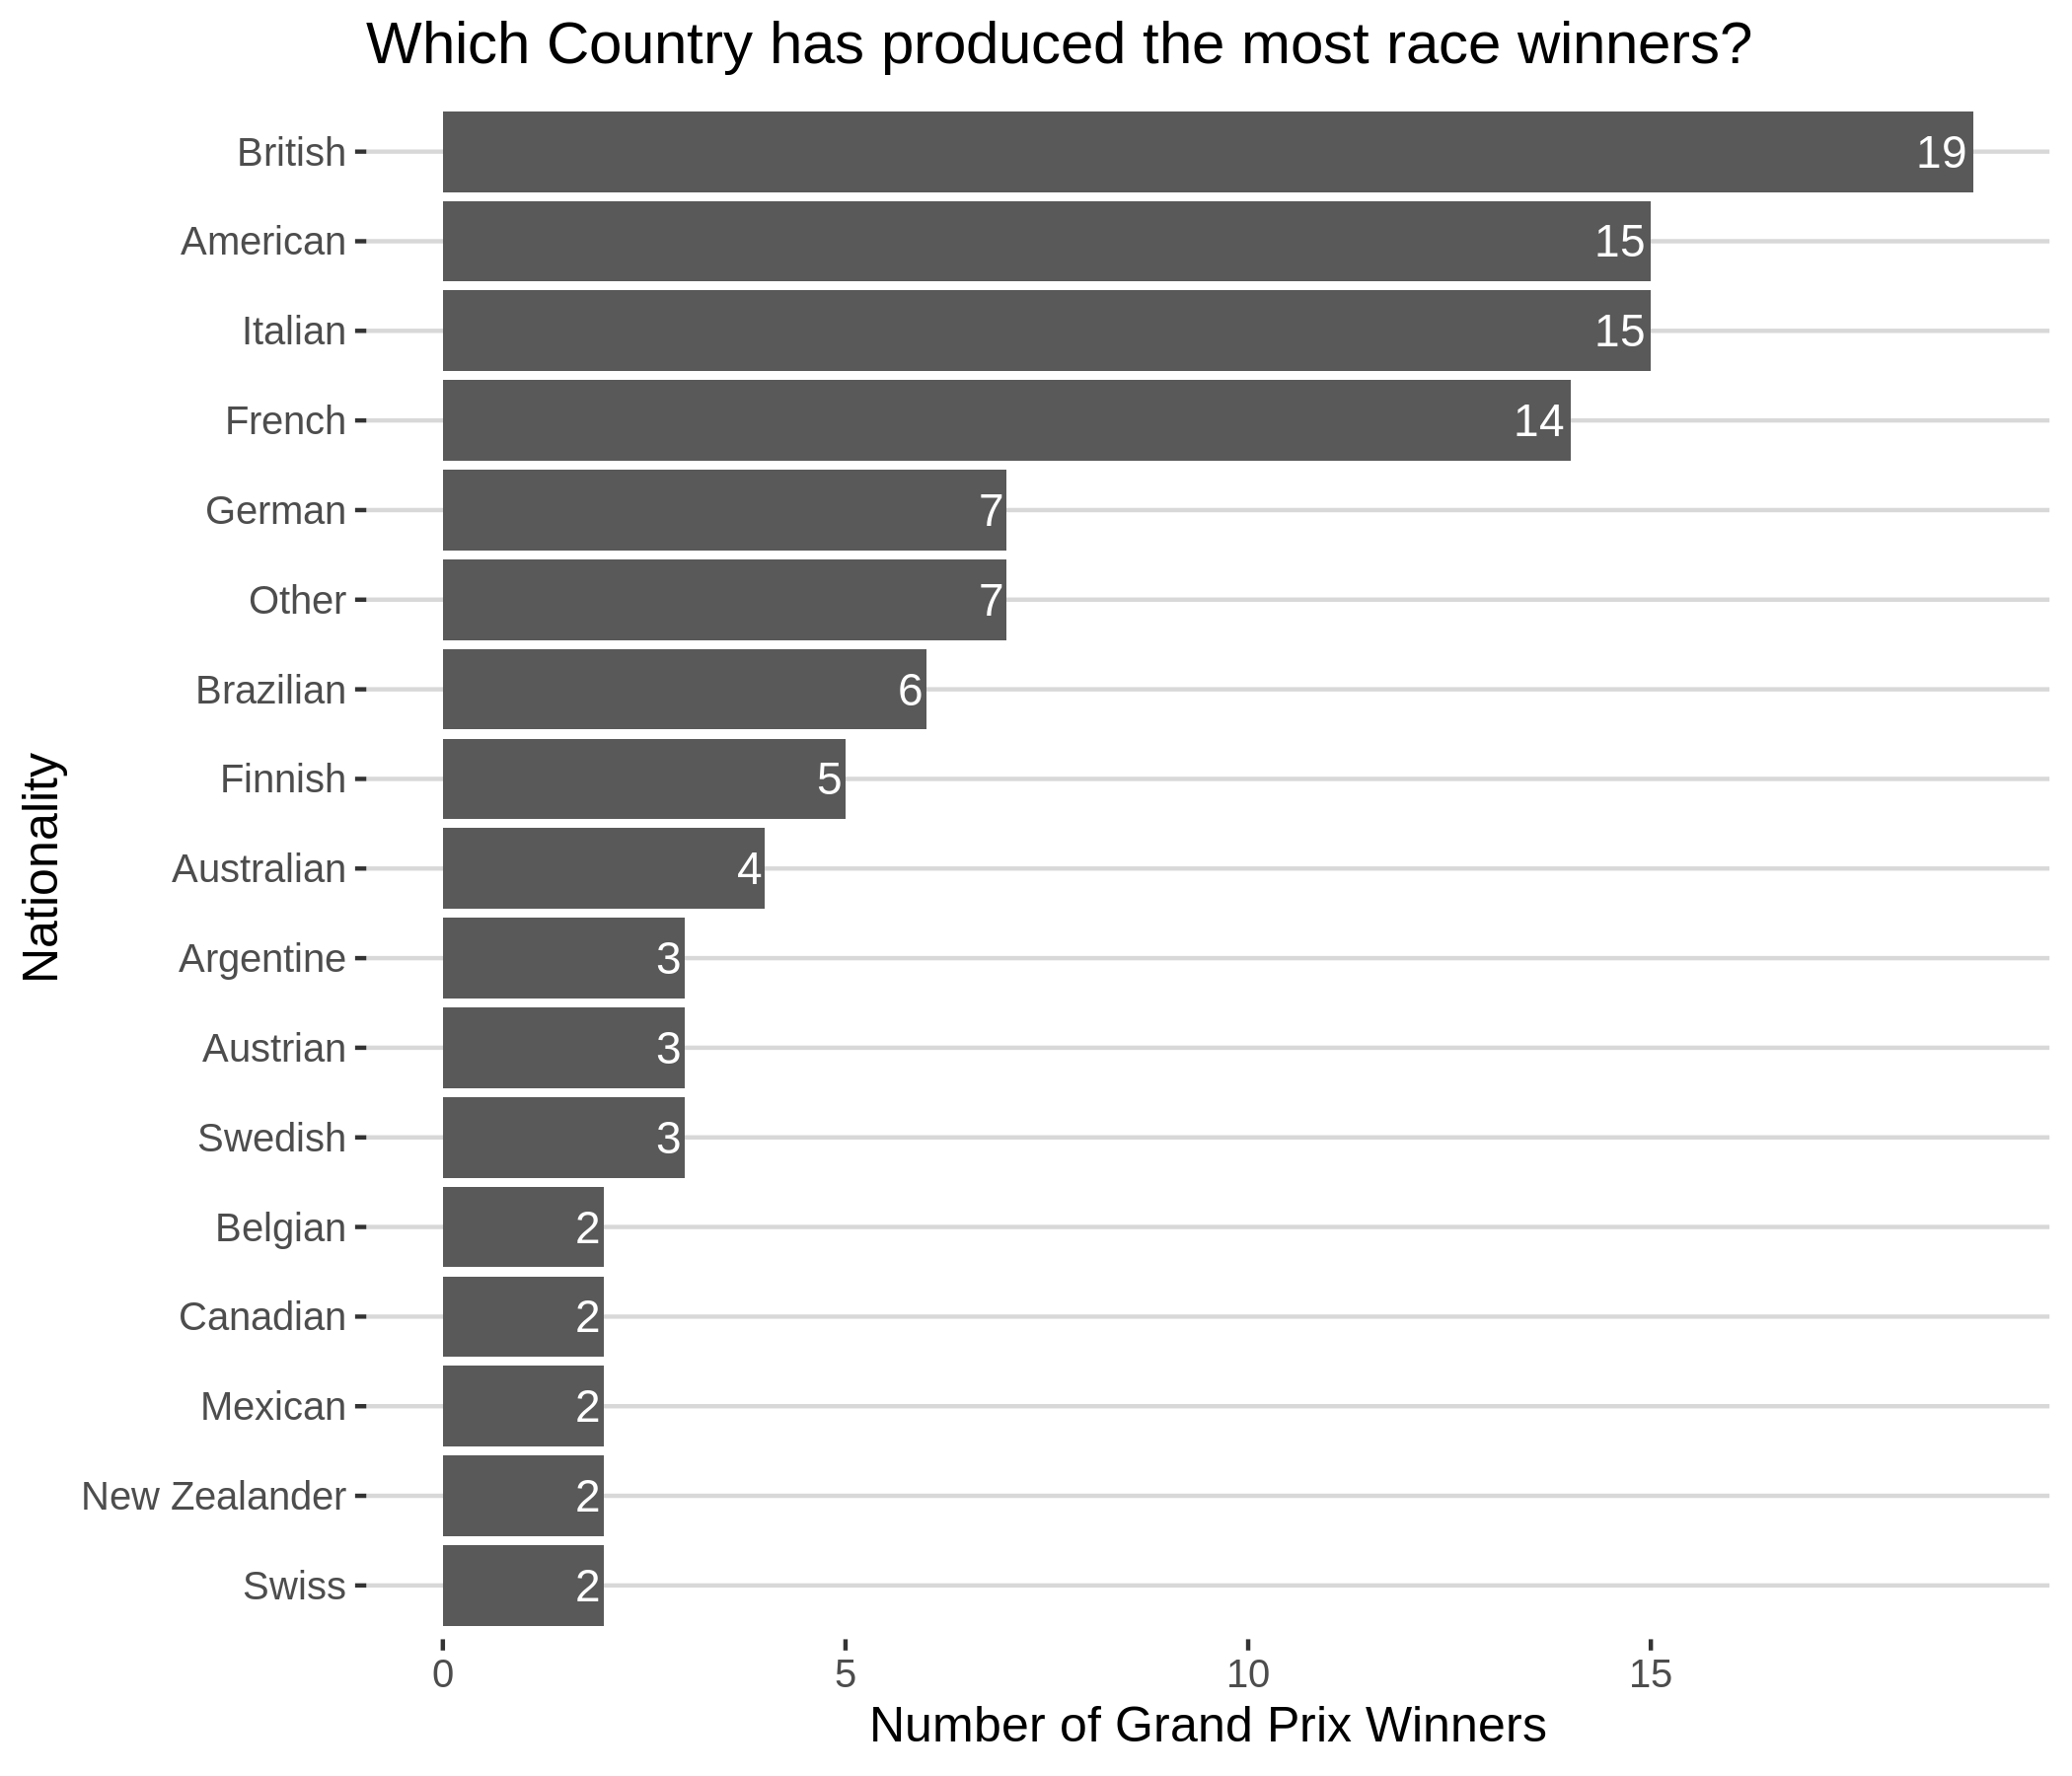

In [122]:
nationality_wins = race_wins %>% left_join(drivers)

p = ggplot(data = nationality_wins, aes(y = fct_rev(fct_infreq(fct_lump(nationality, prop = .01)))))

p = p + geom_bar() + geom_text(stat='count', aes(label=..count..), hjust = 1.1, colour = "white")

p = p + ggtitle("Which Country has produced the most race winners?") + xlab("Number of Grand Prix Winners") + ylab("Nationality")

p + theme_hc() + scale_colour_hc()

## Which Country's drivers have contributed the largest number of race wins?

From the analysis of race winners by country, we saw that there are cases where a country can have several drivers with low number of wins. This would be a poor measure of success, as most world champions of the sport have a considerable number of wins to their name. Thus, a better measure of a country's contribution to wins would be the culmulative number of wins by drivers of that nationality. The chart below that British drivers have contributed the most wins to F1 with 304 amongst their 19 race winning drivers. We can see in this analysis that German drivers, while only boasting the 5th most race winning drivers, contributes the 2nd second highest number of race wins. This aligns better with the narrative told by the first visualization, showing that German drivers have made the 2nd biggest impact in F1 (measured by wins). American drivers fall to the 10th highest number of race wins at 33, indicating its 15 race winning drivers contributed just 2.2 wins each wheras the 7 German drivers contributed an average of 35.8 wins each. Showing how German drivers have contributed much greater success to the sport.

Joining, by = "driverId"



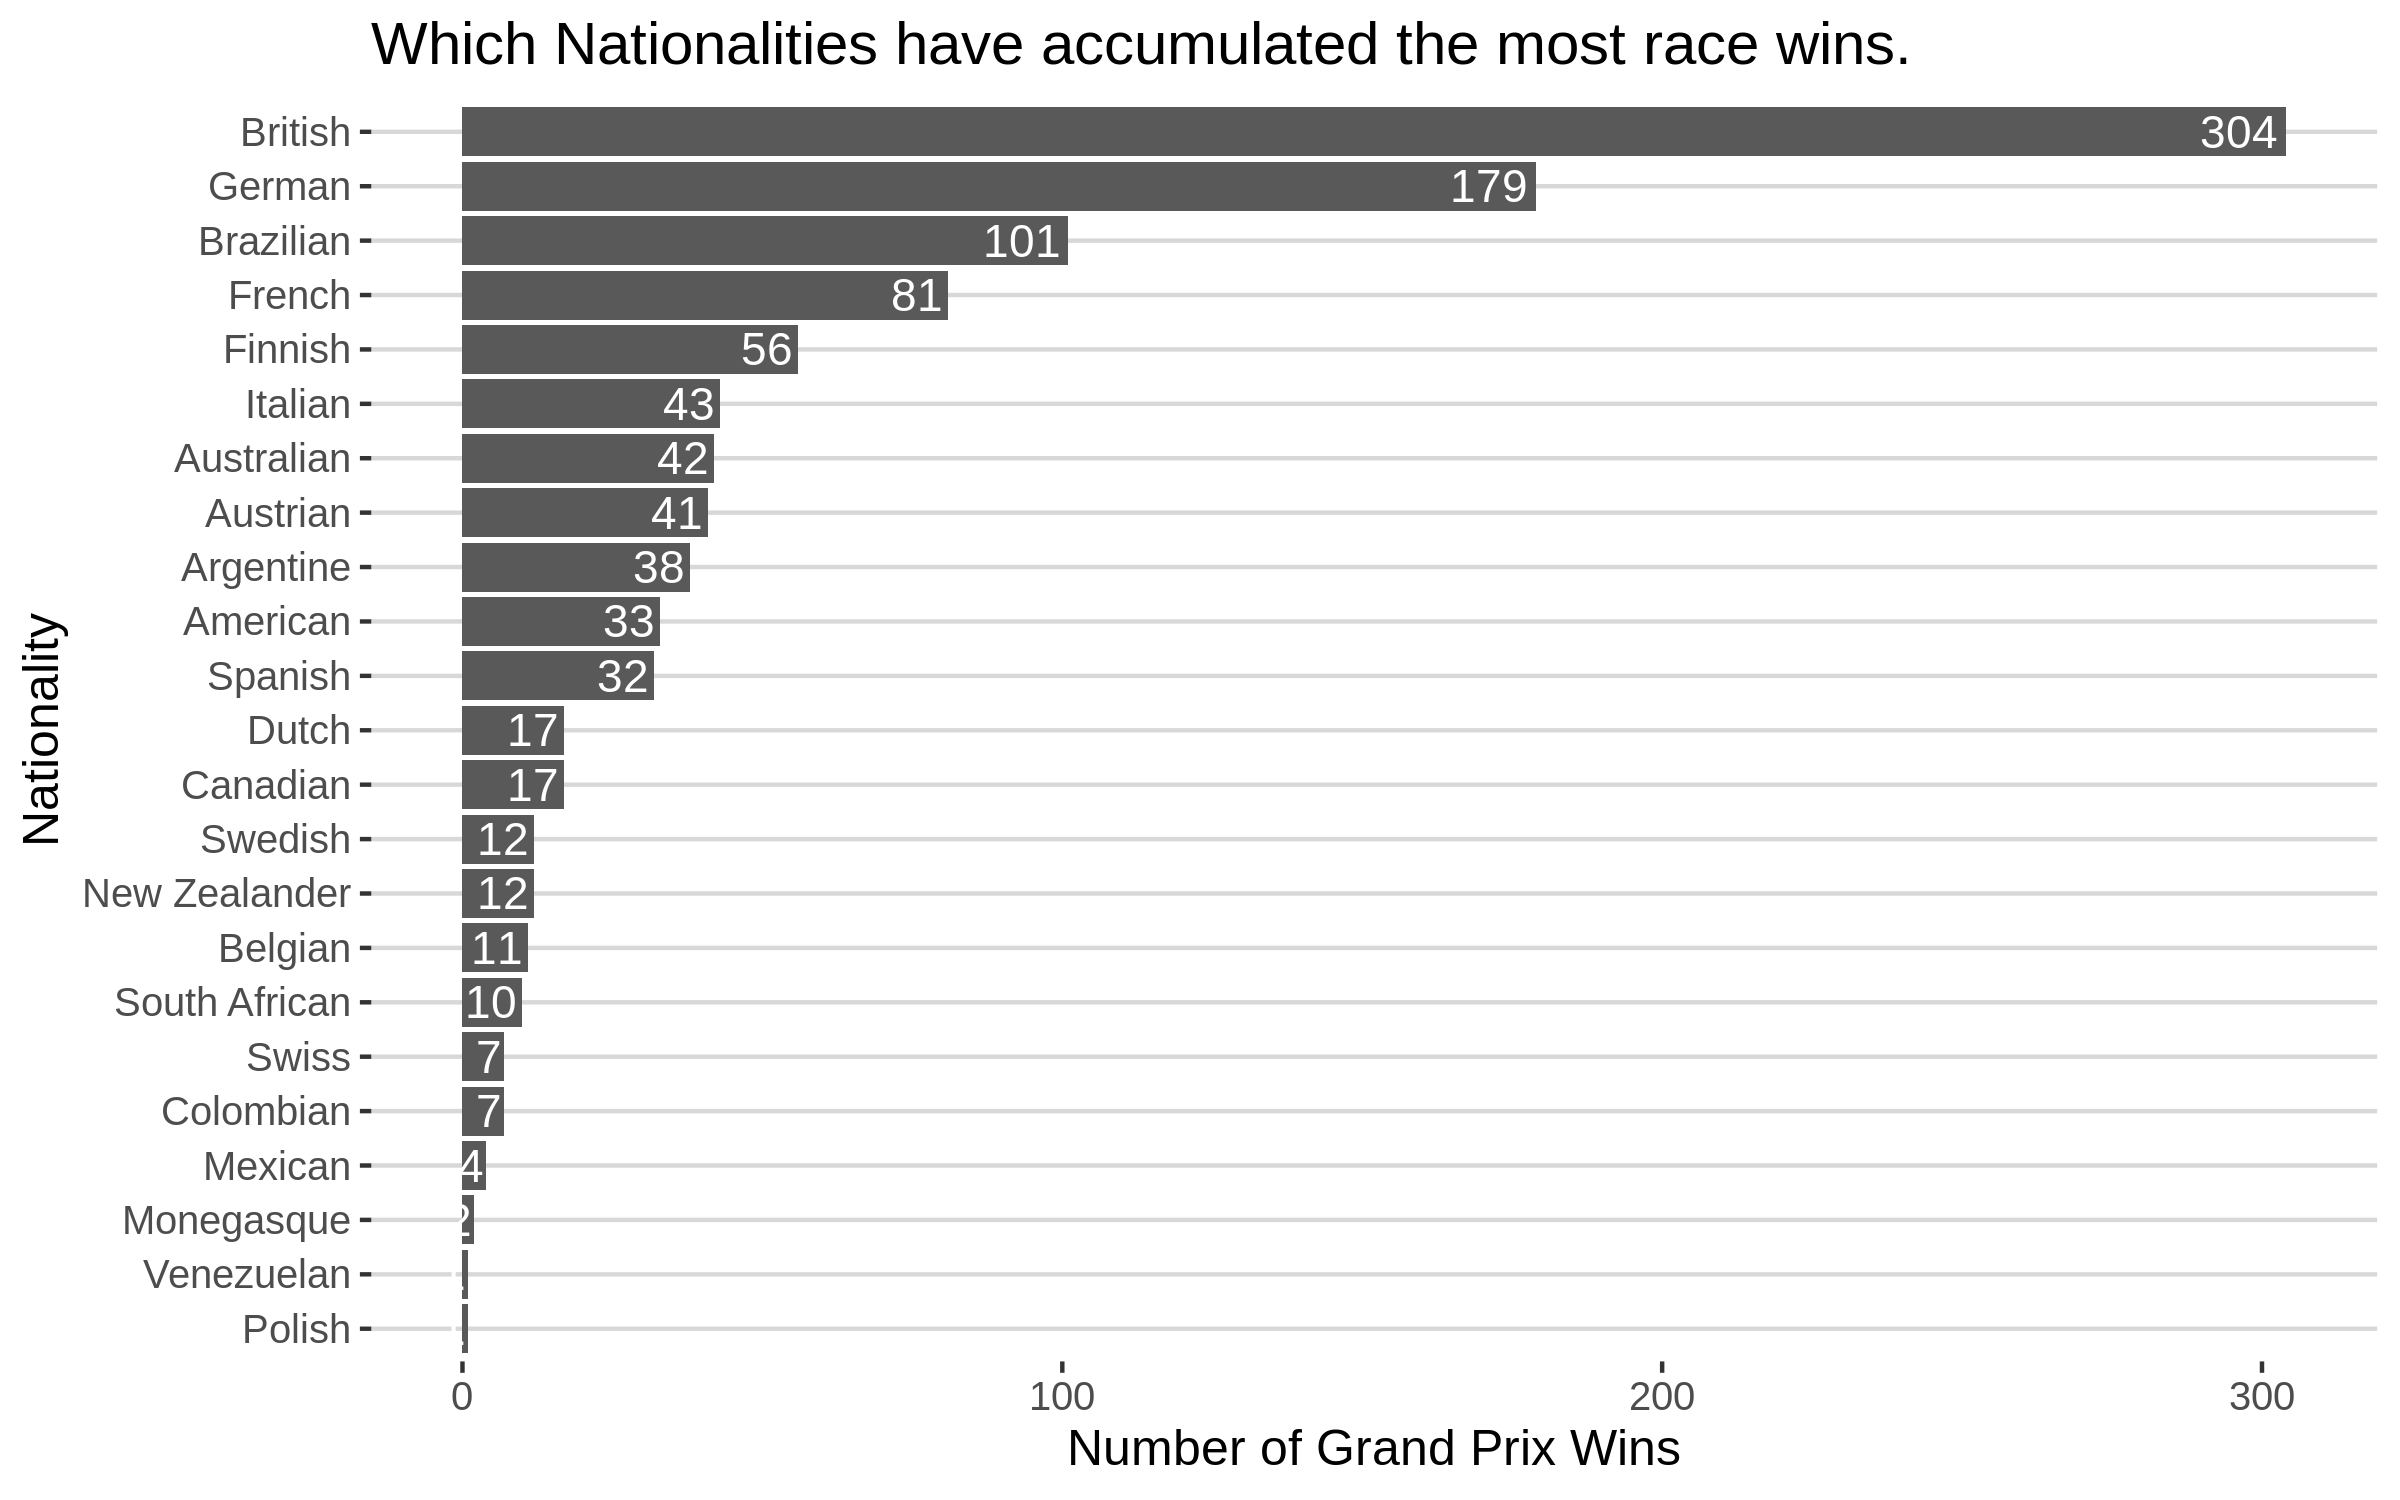

In [130]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)

race_wins = results %>% filter(position == 1) %>% group_by(driverId) %>% summarise(n = n()) # Summarize the number of 1st Place (Race Wins) by driverId.

nationality_wins = race_wins %>% left_join(drivers) %>% group_by(nationality) %>% summarise(Frequency = sum(n)) # Summarize the number of race wins by nationality

p = ggplot(data = nationality_wins, aes(x = Frequency, y = reorder(nationality, Frequency)))

p = p + geom_col() + geom_text(aes(label = Frequency), hjust = 1.1, colour = "white")

p = p + ggtitle("Which Nationalities have accumulated the most race wins.") +  xlab("Number of Grand Prix Wins")  + ylab("Nationality")

p + theme_hc() + scale_colour_hc()